In [1]:
# Core libraries for data handling and calculations
import pandas as pd
import numpy as np

# Libraries for working with the file system
import os
from pathlib import Path

# Libraries for image processing and visualization
import matplotlib.pyplot as plt
from PIL import Image  # To open, resize, and manipulate images
import cv2  # Alternative powerful library for image processing

# Library to split our data into training and testing sets
from sklearn.model_selection import train_test_split

# To suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set matplotlib to display images inline in the notebook
%matplotlib inline

print("✅ All libraries for Data Collection and Preprocessing imported successfully.")

✅ All libraries for Data Collection and Preprocessing imported successfully.


In [2]:
# Step 2: Explore the Dataset Structure
print("Step 2: Exploring Dataset Structure")
print("==================================")

# Define the path to your data folder (update if your folder is named differently)
data_path = Path('data')

# Check if the path exists and list its contents
if data_path.exists():
    print("✅ Data directory found.")
    print("\nContents of the main 'data' directory:")
    for item in data_path.iterdir():
        print(f" - {item.name} {'(directory)' if item.is_dir() else '(file)'}")
else:
    print("❌ The 'data' directory was not found. Please check the path.")

Step 2: Exploring Dataset Structure
✅ Data directory found.

Contents of the main 'data' directory:
 - archive (directory)


In [3]:
# Step 2 (Continued): Explore the Archive Folder
print("\nStep 2 (Continued): Exploring 'archive' directory")
print("===============================================")

# Now define the path to the archive folder
archive_path = data_path / 'archive'

if archive_path.exists():
    print("✅ Archive directory found.")
    print("\nContents of the 'archive' directory:")
    for item in archive_path.iterdir():
        print(f" - {item.name} {'(directory)' if item.is_dir() else '(file)'}")
else:
    print("❌ The 'archive' directory was not found.")


Step 2 (Continued): Exploring 'archive' directory
✅ Archive directory found.

Contents of the 'archive' directory:
 - chest_xray (directory)


In [4]:
# Step 2 (Continue): Explore the chest_xray Folder
print("\nStep 2 (Continue): Exploring 'chest_xray' directory")
print("==================================================")

# Define the path to the chest_xray folder
chest_xray_path = archive_path / 'chest_xray'

if chest_xray_path.exists():
    print("✅ Chest X-ray directory found.")
    print("\nContents of the 'chest_xray' directory:")
    for item in chest_xray_path.iterdir():
        print(f" - {item.name} {'(directory)' if item.is_dir() else '(file)'}")
else:
    print("❌ The 'chest_xray' directory was not found.")


Step 2 (Continue): Exploring 'chest_xray' directory
✅ Chest X-ray directory found.

Contents of the 'chest_xray' directory:
 - test (directory)
 - train (directory)


In [5]:
# Step 3: Explore the Train and Test Directories
print("Step 3: Exploring Train and Test Directories")
print("===========================================")

# Define the paths
train_path = chest_xray_path / 'train'
test_path = chest_xray_path / 'test'

def explore_directory(name, path):
    """Helper function to explore a directory and print its contents."""
    print(f"\nContents of the '{name}' directory:")
    if path.exists():
        for item in path.iterdir():
            print(f" - {item.name} {'(directory)' if item.is_dir() else '(file)'}")
    else:
        print(f"❌ The '{name}' directory was not found.")

explore_directory('train', train_path)
explore_directory('test', test_path)

Step 3: Exploring Train and Test Directories

Contents of the 'train' directory:
 - NORMAL (directory)
 - PNEUMONIA (directory)

Contents of the 'test' directory:
 - NORMAL (directory)
 - PNEUMONIA (directory)


In [6]:
# Step 4: Create the Master DataFrame
print("Step 4: Creating the Master DataFrame")
print("====================================")

# Create lists to store file paths and labels
file_paths = []
labels = []

# Define the main directory to search (now it's 'chest_xray')
main_data_dir = chest_xray_path

# Iterate through each split folder ('train', 'test')
for split_folder in main_data_dir.iterdir():
    if split_folder.is_dir(): # Check if it's a directory like 'train' or 'test'
        split_name = split_folder.name
        # Now iterate through each class folder inside (e.g., 'NORMAL', 'PNEUMONIA')
        for class_folder in split_folder.iterdir():
            if class_folder.is_dir():
                label = class_folder.name # The label is the folder name
                # Now get every image file inside the class folder
                for image_file in class_folder.glob('*.*'): # Looks for any file
                    if image_file.is_file():
                        # Append the full path and the label to our lists
                        file_paths.append(str(image_file))
                        labels.append(label)

# Create the DataFrame
df = pd.DataFrame({'filepath': file_paths, 'label': labels})

# Shuffle the DataFrame to mix the classes (important for training)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows and the total size
print(f"✅ Master DataFrame created successfully!")
print(f"Total images found in the dataset: {len(df)}")
print("\nFirst 5 rows of the DataFrame:")
df.head()

Step 4: Creating the Master DataFrame
✅ Master DataFrame created successfully!
Total images found in the dataset: 5856

First 5 rows of the DataFrame:


,filepath,label
0,data\archive\chest_xray\train\PNEUMONIA\BACTER...,PNEUMONIA
1,data\archive\chest_xray\train\PNEUMONIA\BACTER...,PNEUMONIA
2,data\archive\chest_xray\train\NORMAL\NORMAL-33...,NORMAL
3,data\archive\chest_xray\test\NORMAL\NORMAL-180...,NORMAL
4,data\archive\chest_xray\train\NORMAL\NORMAL-23...,NORMAL


Step 5: Analyzing Class Distribution
Number of images per class:
label
PNEUMONIA    4273
NORMAL       1583
Name: count, dtype: int64


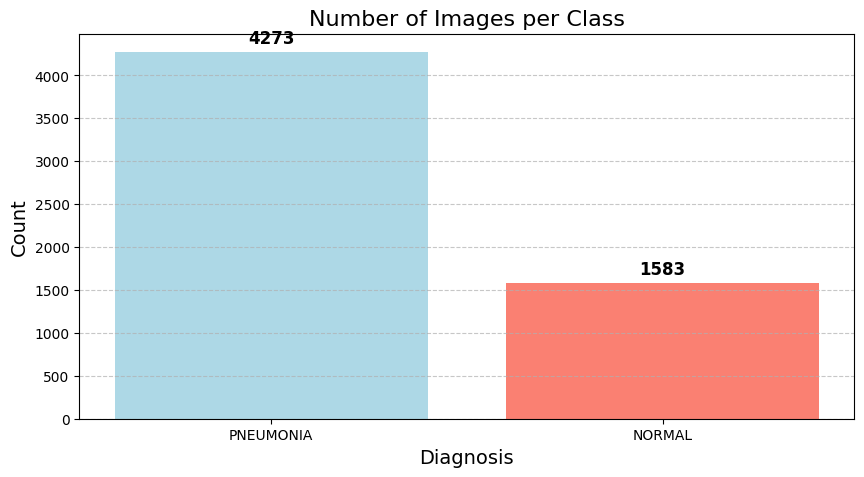

In [7]:
# Step 5: Analyze Class Distribution
print("Step 5: Analyzing Class Distribution")
print("===================================")

# Count the number of images for each class
class_counts = df['label'].value_counts()
print("Number of images per class:")
print(class_counts)

# Create a bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(class_counts.index, class_counts.values, color=['lightblue', 'salmon'])
plt.title('Number of Images per Class', fontsize=16)
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add count labels on top of each bar
for bar, count in zip(bars, class_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, str(count), 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Step 6: Visualizing Sample Images


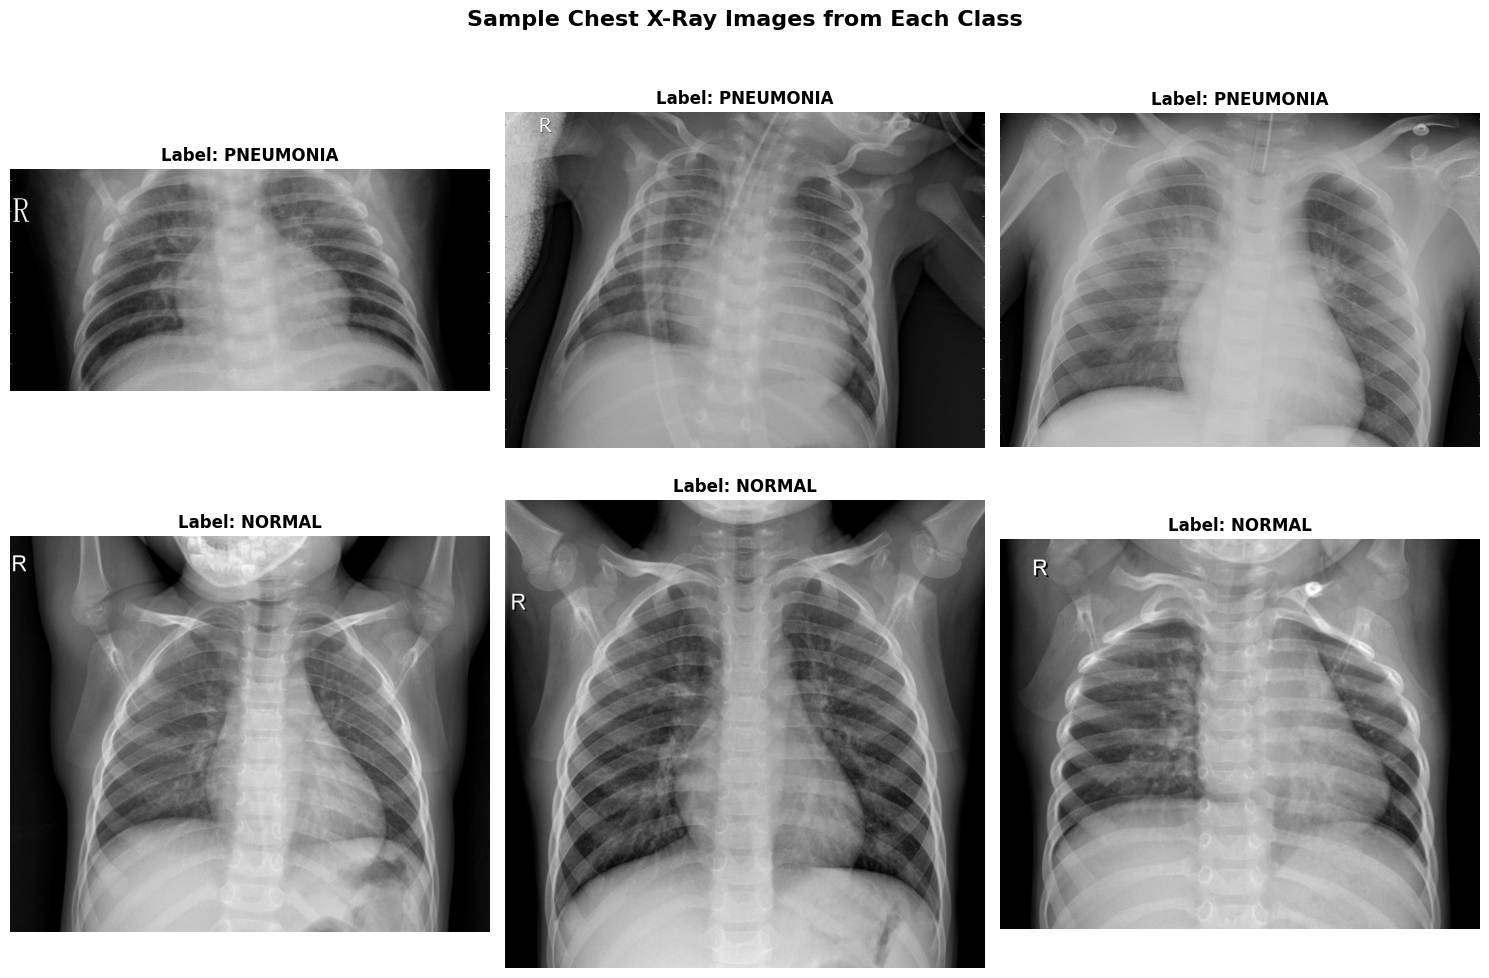

In [8]:
# Step 6: Visualize Sample Images from Each Class
print("Step 6: Visualizing Sample Images")
print("================================")

# Get 3 random images for each class
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Sample Chest X-Ray Images from Each Class', fontsize=16, fontweight='bold')

for i, label in enumerate(df['label'].unique()):
    # Get 3 samples for this label
    sample_files = df[df['label'] == label].sample(3, random_state=42)['filepath'].values
    
    for j, file_path in enumerate(sample_files):
        # Load and display the image
        img = Image.open(file_path)
        axes[i, j].imshow(img, cmap='gray')
        axes[i, j].set_title(f'Label: {label}', fontweight='bold')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

Step 7: Analyzing Image Dimensions
Dimensions of first image (Width x Height): (1160, 856)

Based on a sample of 100 images:
Average Height: 1001, Average Width: 1354
Min Height: 232, Max Height: 2534
Min Width: 445, Max Width: 2890


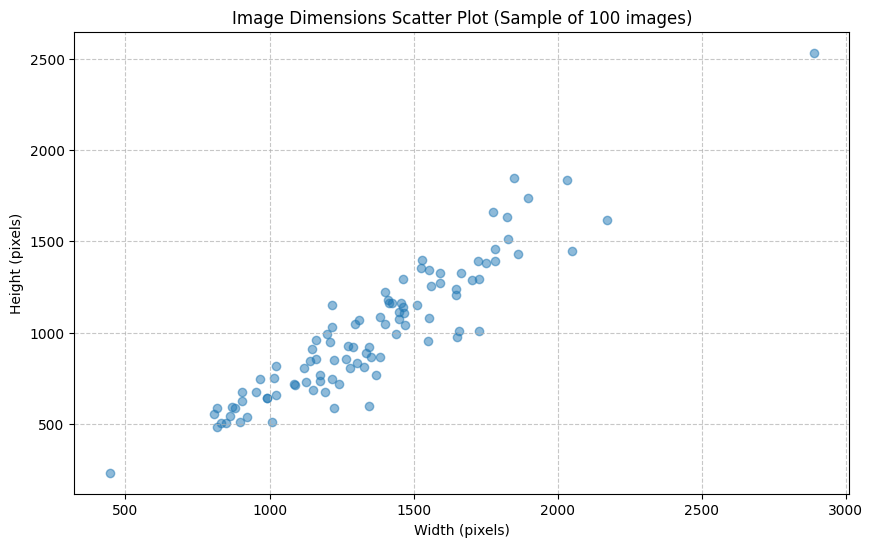

In [9]:
# Step 7: Check Image Dimensions
print("Step 7: Analyzing Image Dimensions")
print("=================================")

# Check the dimensions of the first image to get an idea
sample_img_path = df['filepath'].iloc[0]
sample_img = Image.open(sample_img_path)
print(f"Dimensions of first image (Width x Height): {sample_img.size}")

# Let's check the dimensions of a sample of images
heights = []
widths = []

# Let's check 100 images to save time (you can increase this number if you want)
for img_path in df['filepath'].head(100):
    with Image.open(img_path) as img:
        heights.append(img.height)
        widths.append(img.width)

print(f"\nBased on a sample of 100 images:")
print(f"Average Height: {np.mean(heights):.0f}, Average Width: {np.mean(widths):.0f}")
print(f"Min Height: {np.min(heights)}, Max Height: {np.max(heights)}")
print(f"Min Width: {np.min(widths)}, Max Width: {np.max(widths)}")

# Create a scatter plot to see the distribution of dimensions
plt.figure(figsize=(10, 6))
plt.scatter(widths, heights, alpha=0.5)
plt.title('Image Dimensions Scatter Plot (Sample of 100 images)')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [10]:
# Step 8: Data Summary and Preprocessing Plan
print("Step 8: Data Summary and Preprocessing Plan")
print("==========================================")
print("✅ DATA COLLECTION COMPLETE")
print(f"   - Total Images: {len(df)}")
print(f"   - Classes: {df['label'].nunique()} ({', '.join(df['label'].unique())})")
print("")
print("📊 KEY FINDINGS FROM ANALYSIS:")
print("   - SEVERE CLASS IMBALANCE: Pneumonia cases (4,273) >> Normal cases (1,583)")
print("   - VARIABLE IMAGE SIZES: Ranging from (445x232) to (2890x2534) pixels")
print("")
print("🎯 PREPROCESSING PLAN FOR MODULE 2:")
print("   1. Handle Class Imbalance: Use techniques like data augmentation")
print("   2. Standardize Image Size: Resize all images to a fixed size (e.g., 224x224, 256x256)")
print("   3. Split Data: Create train, validation, and test sets")
print("   4. Normalize Pixel Values: Scale from 0-255 to 0-1 for better model training")
print("")
print("Module 1: Data Collection and Preprocessing - ✅ COMPLETE")
print("Ready to proceed to Module 2: Model Development!")

Step 8: Data Summary and Preprocessing Plan
✅ DATA COLLECTION COMPLETE
   - Total Images: 5856
   - Classes: 2 (PNEUMONIA, NORMAL)

📊 KEY FINDINGS FROM ANALYSIS:
   - SEVERE CLASS IMBALANCE: Pneumonia cases (4,273) >> Normal cases (1,583)
   - VARIABLE IMAGE SIZES: Ranging from (445x232) to (2890x2534) pixels

🎯 PREPROCESSING PLAN FOR MODULE 2:
   1. Handle Class Imbalance: Use techniques like data augmentation
   2. Standardize Image Size: Resize all images to a fixed size (e.g., 224x224, 256x256)
   3. Split Data: Create train, validation, and test sets
   4. Normalize Pixel Values: Scale from 0-255 to 0-1 for better model training

Module 1: Data Collection and Preprocessing - ✅ COMPLETE
Ready to proceed to Module 2: Model Development!


In [11]:
# Preprocessing Step 1: Split the Data
print("Preprocessing Step 1: Splitting Data into Train, Validation, and Test Sets")
print("========================================================================")

# First, split into temporary train (80%) and test (20%) sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# Then, split the temporary train set into final train (80%) and validation (20%) sets
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['label'])

# Print the results
print(f"✅ Data splitting complete!")
print(f"   - Training set:   {len(train_df)} images")
print(f"   - Validation set: {len(val_df)} images")
print(f"   - Test set:       {len(test_df)} images")
print("\nClass distribution in each set:")
print("\nTraining Set:")
print(train_df['label'].value_counts())
print("\nValidation Set:")
print(val_df['label'].value_counts())
print("\nTest Set:")
print(test_df['label'].value_counts())

Preprocessing Step 1: Splitting Data into Train, Validation, and Test Sets
✅ Data splitting complete!
   - Training set:   3747 images
   - Validation set: 937 images
   - Test set:       1172 images

Class distribution in each set:

Training Set:
label
PNEUMONIA    2734
NORMAL       1013
Name: count, dtype: int64

Validation Set:
label
PNEUMONIA    684
NORMAL       253
Name: count, dtype: int64

Test Set:
label
PNEUMONIA    855
NORMAL       317
Name: count, dtype: int64


In [12]:
# Preprocessing Step 2: Create Image Preprocessing Function
print("Preprocessing Step 2: Creating Image Preprocessing Function")
print("==========================================================")

# Define the target size for all images. A common choice for AI models is 224x224 or 256x256.
TARGET_SIZE = (224, 224) 

def load_and_preprocess_image(filepath, target_size=TARGET_SIZE):
    """
    Loads an image from a filepath, resizes it, and normalizes its pixel values.
    
    Args:
        filepath (str): The path to the image file.
        target_size (tuple): The desired size (width, height). Default is (224, 224).
    
    Returns:
        numpy.ndarray: The preprocessed image as a normalized array.
    """
    # 1. Read the image file
    image = Image.open(filepath).convert('RGB') # Ensure it's in color (3 channels)
    # 2. Resize the image to the target size
    image = image.resize(target_size)
    # 3. Convert the image to a numpy array
    image_array = np.array(image)
    # 4. Normalize pixel values from 0-255 to 0-1 (common practice for neural networks)
    image_array = image_array / 255.0
    
    return image_array

# Test the function on a single image to make sure it works
test_image_path = train_df['filepath'].iloc[0]
print(f"Testing preprocessing function on: {test_image_path}")
preprocessed_image = load_and_preprocess_image(test_image_path)

print(f"✅ Preprocessing successful!")
print(f"   Original image size: {Image.open(test_image_path).size}")
print(f"   Preprocessed image shape: {preprocessed_image.shape}")
print(f"   Pixel value range: [{np.min(preprocessed_image):.3f}, {np.max(preprocessed_image):.3f}]")

Preprocessing Step 2: Creating Image Preprocessing Function
Testing preprocessing function on: data\archive\chest_xray\train\NORMAL\NORMAL-5187821-0001.jpeg
✅ Preprocessing successful!
   Original image size: (1506, 833)
   Preprocessed image shape: (224, 224, 3)
   Pixel value range: [0.000, 1.000]


In [13]:
# Preprocessing Step 3: Apply Preprocessing to All Data
print("Preprocessing Step 3: Applying Preprocessing to All Datasets")
print("===========================================================")
print("This will take a few minutes. Please wait...")

def create_dataset(dataframe):
    """Applies the preprocessing function to all images in a dataframe."""
    X = []  # List to store image arrays
    y = []  # List to store labels
    
    for i, (filepath, label) in enumerate(dataframe[['filepath', 'label']].values):
        # Preprocess the image and add it to the list
        processed_image = load_and_preprocess_image(filepath)
        X.append(processed_image)
        y.append(label)
        
        # Optional: Print a progress update every 500 images
        if (i+1) % 500 == 0:
            print(f"Processed {i+1} images...")
    
    # Convert lists to numpy arrays (the format needed for training)
    X = np.array(X)
    y = np.array(y)
    
    return X, y

# Apply to Training Set
print("\nProcessing Training Set:")
X_train, y_train = create_dataset(train_df)

# Apply to Validation Set
print("\nProcessing Validation Set:")
X_val, y_val = create_dataset(val_df)

# Apply to Test Set
print("\nProcessing Test Set:")
X_test, y_test = create_dataset(test_df)

print("\n✅ All datasets preprocessed successfully!")
print(f"   X_train shape: {X_train.shape}")
print(f"   X_val shape:   {X_val.shape}")
print(f"   X_test shape:  {X_test.shape}")

Preprocessing Step 3: Applying Preprocessing to All Datasets
This will take a few minutes. Please wait...

Processing Training Set:
Processed 500 images...
Processed 1000 images...
Processed 1500 images...
Processed 2000 images...
Processed 2500 images...
Processed 3000 images...
Processed 3500 images...

Processing Validation Set:
Processed 500 images...

Processing Test Set:
Processed 500 images...
Processed 1000 images...

✅ All datasets preprocessed successfully!
   X_train shape: (3747, 224, 224, 3)
   X_val shape:   (937, 224, 224, 3)
   X_test shape:  (1172, 224, 224, 3)


In [2]:
# 1. Re-import necessary libraries
import pandas as pd
from pathlib import Path

# 2. Recreate the main DataFrame (df) by scanning the data folder
data_path = Path('data/archive/chest_xray')
file_paths = []
labels = []

for split_folder in data_path.iterdir():
    if split_folder.is_dir():
        for class_folder in split_folder.iterdir():
            if class_folder.is_dir():
                label = class_folder.name
                for image_file in class_folder.glob('*.*'):
                    if image_file.is_file():
                        file_paths.append(str(image_file))
                        labels.append(label)

df = pd.DataFrame({'filepath': file_paths, 'label': labels})

# 3. Recreate the train_df, val_df, and test_df splits
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['label'])

print("✅ DataFrames recreated successfully!")
print(f"test_df contains {len(test_df)} images")

✅ DataFrames recreated successfully!
test_df contains 1172 images


In [3]:
# Fixed code: Create folder with 100 sample images for GitHub
import shutil
from pathlib import Path
import pandas as pd

# Create a new folder called 'sample_data'
sample_dir = Path('sample_data')
sample_dir.mkdir(exist_ok=True)  # Create folder if it doesn't exist

# Clear the folder if it already has files (to avoid duplicates)
for existing_file in sample_dir.glob('*'):
    existing_file.unlink()

print("Created 'sample_data' folder and cleared any old files.")

# Get 50 normal and 50 pneumonia images from the TEST set
sample_files = []
for label in ['NORMAL', 'PNEUMONIA']:
    # Get filepaths for this label
    files = test_df[test_df['label'] == label]['filepath'].head(50).tolist()
    sample_files.extend(files)
    print(f"Found {len(files)} files for label: {label}")

# Copy these images to the new folder
copied_count = 0
for file_path in sample_files:
    try:
        source_path = Path(file_path)
        if source_path.exists():
            dest_path = sample_dir / source_path.name
            shutil.copy2(source_path, dest_path)
            copied_count += 1
        else:
            print(f"Warning: File not found - {file_path}")
    except Exception as e:
        print(f"Error copying {file_path}: {e}")

print(f"✅ Successfully copied {copied_count} images to 'sample_data' folder.")
print(f"Expected to copy: {len(sample_files)} images")

# List the files in the sample_data folder to verify
print("\nFiles in sample_data folder:")
for file in sample_dir.iterdir():
    print(f" - {file.name}")

Created 'sample_data' folder and cleared any old files.
Found 50 files for label: NORMAL
Found 50 files for label: PNEUMONIA
✅ Successfully copied 100 images to 'sample_data' folder.
Expected to copy: 100 images

Files in sample_data folder:
 - BACTERIA-1514320-0003.jpeg
 - BACTERIA-1576543-0001.jpeg
 - BACTERIA-2190092-0005.jpeg
 - BACTERIA-2429208-0002.jpeg
 - BACTERIA-2442765-0001.jpeg
 - BACTERIA-2565888-0001.jpeg
 - BACTERIA-2960250-0001.jpeg
 - BACTERIA-2971615-0001.jpeg
 - BACTERIA-3030644-0001.jpeg
 - BACTERIA-3303372-0001.jpeg
 - BACTERIA-338181-0003.jpeg
 - BACTERIA-3388576-0002.jpeg
 - BACTERIA-4342499-0003.jpeg
 - BACTERIA-4360657-0001.jpeg
 - BACTERIA-4719778-0002.jpeg
 - BACTERIA-4749901-0001.jpeg
 - BACTERIA-4973842-0004.jpeg
 - BACTERIA-5066255-0001.jpeg
 - BACTERIA-5164118-0002.jpeg
 - BACTERIA-5240350-0002.jpeg
 - BACTERIA-5296133-0002.jpeg
 - BACTERIA-5486482-0001.jpeg
 - BACTERIA-5882940-0007.jpeg
 - BACTERIA-6162615-0002.jpeg
 - BACTERIA-6565531-0001.jpeg
 - BACTER

In [4]:
# Delete the old sample_data folder and its contents
import shutil
from pathlib import Path

sample_dir = Path('sample_data')

if sample_dir.exists():
    shutil.rmtree(sample_dir)  # This permanently deletes the folder and everything in it
    print("✅ Old 'sample_data' folder has been deleted.")
else:
    print("❌ 'sample_data' folder does not exist.")

❌ 'sample_data' folder does not exist.


In [5]:
# Create a NEW folder with 80 sample images (40 from each class)
import shutil
from pathlib import Path

# Remove the old sample_data folder if it exists (to start fresh)
sample_dir = Path('sample_data')
if sample_dir.exists():
    import shutil
    shutil.rmtree(sample_dir)

# Create a new folder called 'sample_data'
sample_dir.mkdir(exist_ok=True)

# Get 40 normal and 40 pneumonia images from the TEST set
sample_files = []
for label in ['NORMAL', 'PNEUMONIA']:
    files = test_df[test_df['label'] == label]['filepath'].head(40).tolist()
    sample_files.extend(files)

# Copy these images to the new folder
copied_count = 0
for file_path in sample_files:
    try:
        source_path = Path(file_path)
        if source_path.exists():
            dest_path = sample_dir / source_path.name
            shutil.copy2(source_path, dest_path)
            copied_count += 1
    except Exception as e:
        print(f"Error copying {file_path}: {e}")

print(f"✅ Created NEW 'sample_data' folder with {copied_count} images.")

✅ Created NEW 'sample_data' folder with 80 images.
